<a href="https://colab.research.google.com/github/shyamjith94/TimeSeriesDataAnalysis/blob/main/ARMAAndARIMATimeSeriesAnalysisModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [376]:
%%capture
! pip3 install pmdarima


In [377]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab

from statsmodels.tsa.arima_model import ARMA, ARIMA, ARIMAResults, ARMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

from statsmodels.tsa.statespace.tools import diff
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.seasonal import seasonal_decompose

#adf
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [378]:
data_2 = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/DailyTotalFemaleBirths.csv", index_col="Date", parse_dates=True)
data_2.index.freq = 'D' # daily data stationary
data_2.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq='D')

In [379]:
data_3 = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/TradeInventories.csv", index_col="Date", parse_dates=True)
data_3.index.freq = 'MS' # daily data stationary
data_3.index

DatetimeIndex(['1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=264, freq='MS')

In [380]:
# first four month data
data_2 = data_2[:120]

In [381]:
data_2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


#**ARMA**

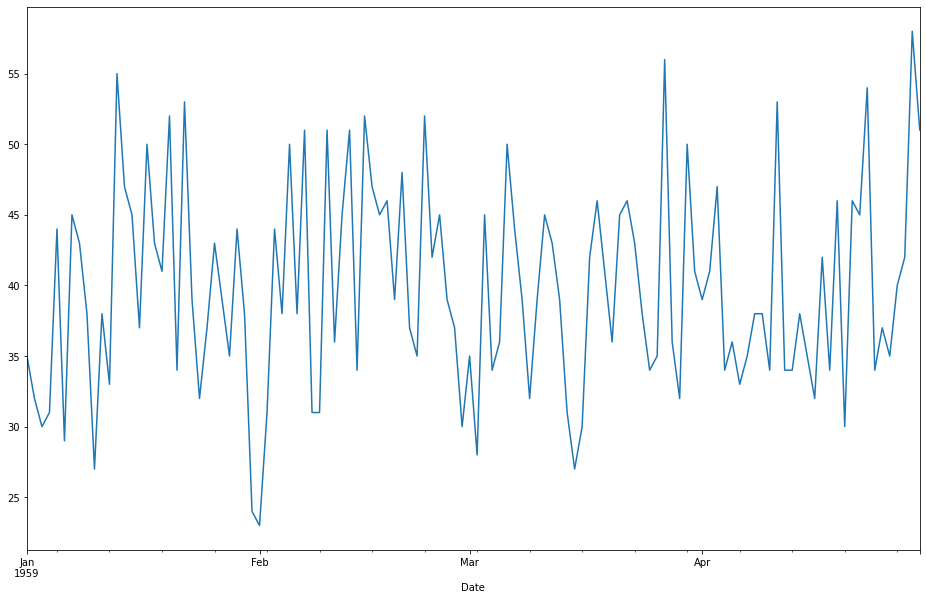

In [382]:
data_2['Births'].plot(figsize=(16,10))

**ADF report**


In [383]:
def adf_test(series, title=''):
    """
    pass time series and titile is optional
    return ADF report
    """
    print(f'Augmented Dickey-Fuller test : {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    label = ['ADF test statistics', 'p_value', 'lags_used', 'observations']
    out = pd.Series(result[0:4], index=label)

    # iterate adfuller test dict
    for key, val in result[4].items():
        out[f'critical_value({key})'] = val
    print(out.to_string())
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data a unit root and is non-stationay')

In [384]:
adf_test(data_2['Births'])

Augmented Dickey-Fuller test : 
ADF test statistics   -9.855384e+00
p_value                4.373545e-17
lags_used              0.000000e+00
observations           1.190000e+02
critical_value(1%)    -3.486535e+00
critical_value(5%)    -2.886151e+00
critical_value(10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [385]:
auto_arima(data_2['Births'], seasonal=False)

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [386]:
auto_arima(data_2['Births'], seasonal=False,start_p=0, start_q=0, max_p=3, max_q=6, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1230.607, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=896.926, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1121.103, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=824.647, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=823.489, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=824.747, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=826.399, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.970 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Fri, 13 Nov 2020   AIC                            823.489
Time:                        07:46:38   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [387]:
train_data_2 = data_2.iloc[:90]
test_data_2 = data_2.iloc[90:]

In [388]:
model = ARMA(train_data_2['Births'], order=(2,2))

In [389]:
result = model.fit()

In [390]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Fri, 13 Nov 2020   AIC                            627.809
Time:                        07:46:38   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.608      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [391]:
# -1 for avoid indexbond exception
start = len(train_data_2)
end = len(train_data_2) + len(test_data_2) - 1

In [392]:
predication = result.predict(start, end).rename('ARMA 2 2 predications')
predication

1959-04-01    39.982215
1959-04-02    39.992604
1959-04-03    39.809822
1959-04-04    39.848166
1959-04-05    39.761531
1959-04-06    39.794248
1959-04-07    39.750494
1959-04-08    39.772827
1959-04-09    39.749654
1959-04-10    39.763661
1959-04-11    39.750985
1959-04-12    39.759426
1959-04-13    39.752348
1959-04-14    39.757331
1959-04-15    39.753329
1959-04-16    39.756238
1959-04-17    39.753958
1959-04-18    39.755646
1959-04-19    39.754341
1959-04-20    39.755317
1959-04-21    39.754569
1959-04-22    39.755132
1959-04-23    39.754702
1959-04-24    39.755027
1959-04-25    39.754780
1959-04-26    39.754967
1959-04-27    39.754824
1959-04-28    39.754932
1959-04-29    39.754850
1959-04-30    39.754912
Freq: D, Name: ARMA 2 2 predications, dtype: float64

In [393]:
test_data_2

,Births
Date,
1959-04-01,39
1959-04-02,41
1959-04-03,47
1959-04-04,34
1959-04-05,36
1959-04-06,33
1959-04-07,35
1959-04-08,38
1959-04-09,38


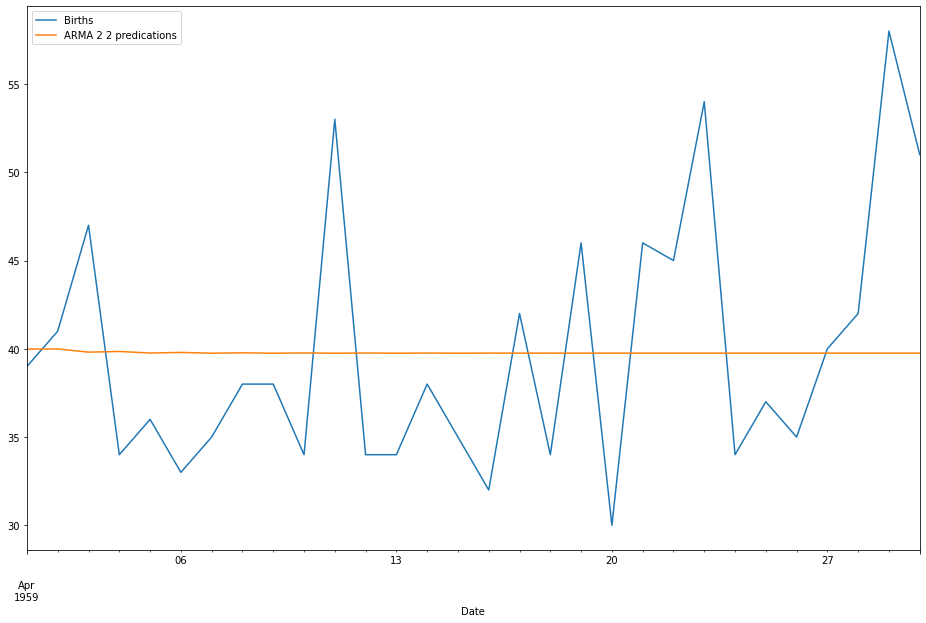

In [394]:
test_data_2['Births'].plot(figsize=(16,10), legend=True)
predication.plot(figsize=(16,10), legend=True)

In [395]:
test_data_2.mean()

Births    39.833333
dtype: float64

In [396]:
predication.mean()

39.777427784045514

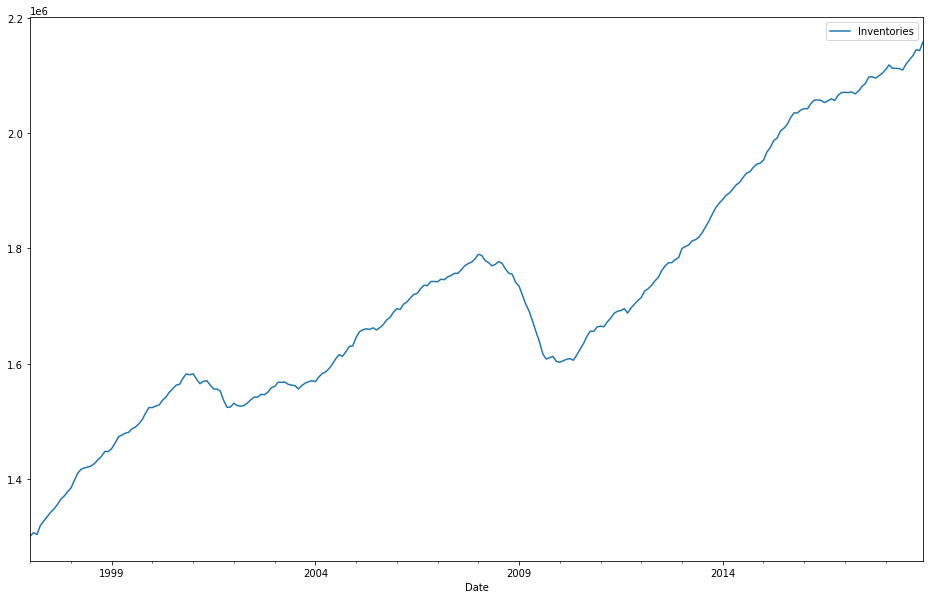

In [397]:
data_3.plot(figsize=(16,10))

Text(0, 0.5, 'resid')

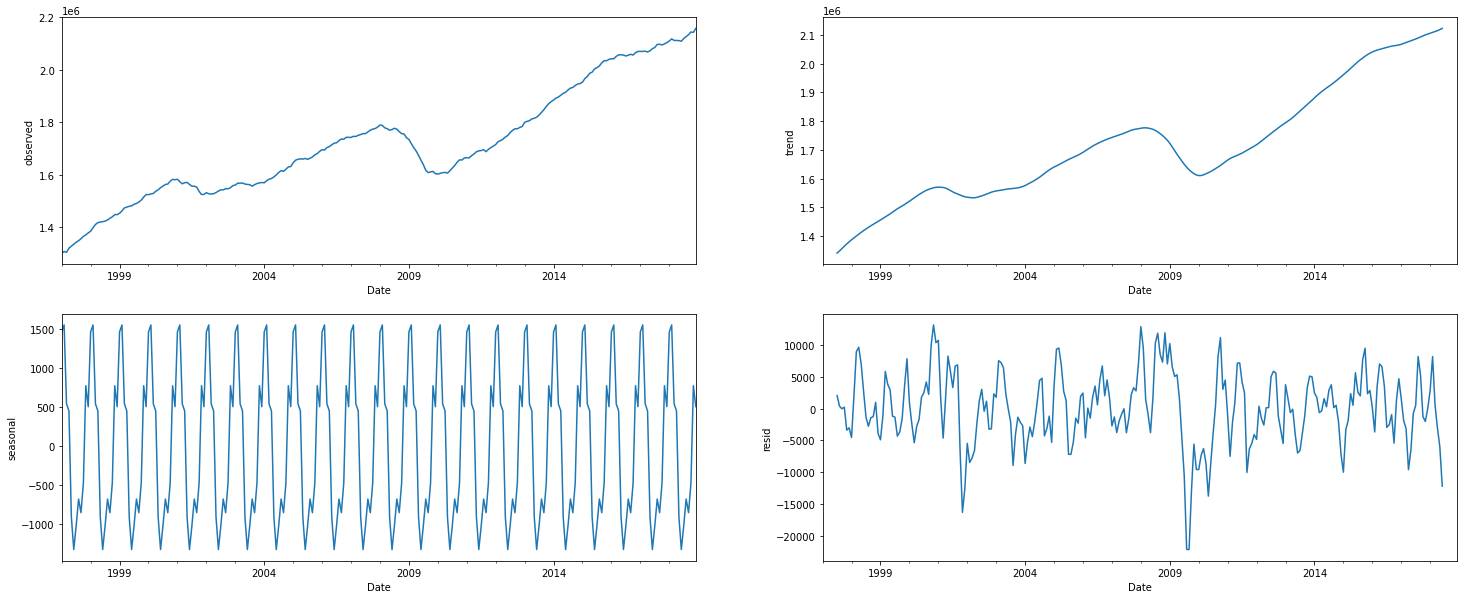

In [398]:
fig, axe = plt.subplots(2,2,figsize=(25,10))
result = seasonal_decompose(data_3['Inventories'], model='add')
result.observed.plot(ax=axe[0,0])
axe[0,0].set_ylabel("observed")

result.trend.plot(ax=axe[0,1])
axe[0,1].set_ylabel("trend")

result.seasonal.plot(ax=axe[1,0])
axe[1,0].set_ylabel("seasonal")

result.resid.plot(ax=axe[1,1])
axe[1,1].set_ylabel("resid")


In [399]:
auto_arima(data_3['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Fri, 13 Nov 2020   AIC                           5348.037
Time:                        07:46:41   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [400]:
auto_arima(data_3['Inventories'], seasonal=False)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [401]:
adf_test(data_3['Inventories'])

Augmented Dickey-Fuller test : 
ADF test statistics     -0.087684
p_value                  0.950652
lags_used                5.000000
observations           258.000000
critical_value(1%)      -3.455953
critical_value(5%)      -2.872809
critical_value(10%)     -2.572775
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data a unit root and is non-stationay


In [402]:
# 
data_3['DIFF_1'] = diff(data_3['Inventories'], k_diff=1)

In [403]:
data_3.head()

,Inventories,DIFF_1
Date,,
1997-01-01,1301161,NaN
1997-02-01,1307080,5919.0
1997-03-01,1303978,-3102.0
1997-04-01,1319740,15762.0
1997-05-01,1327294,7554.0


In [404]:
adf_test(data_3['Inventories'])

Augmented Dickey-Fuller test : 
ADF test statistics     -0.087684
p_value                  0.950652
lags_used                5.000000
observations           258.000000
critical_value(1%)      -3.455953
critical_value(5%)      -2.872809
critical_value(10%)     -2.572775
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data a unit root and is non-stationay


In [405]:
adf_test(data_3['DIFF_1'])

Augmented Dickey-Fuller test : 
ADF test statistics     -3.412249
p_value                  0.010548
lags_used                4.000000
observations           258.000000
critical_value(1%)      -3.455953
critical_value(5%)      -2.872809
critical_value(10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


**classical aproch to pdq**

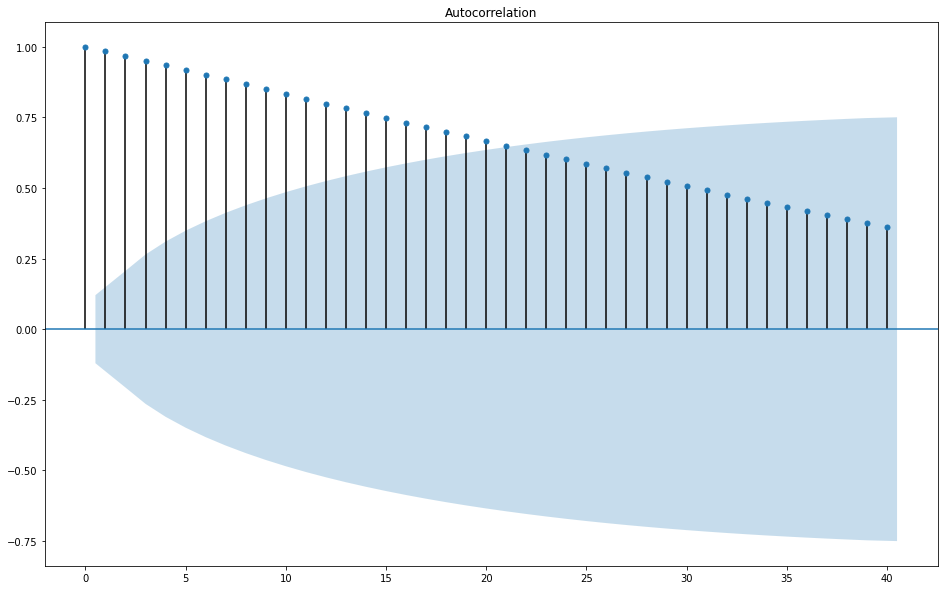

In [406]:
fig, axe = plt.subplots(figsize=(16,10))
plot_acf(data_3['Inventories'], ax=axe, lags=40);

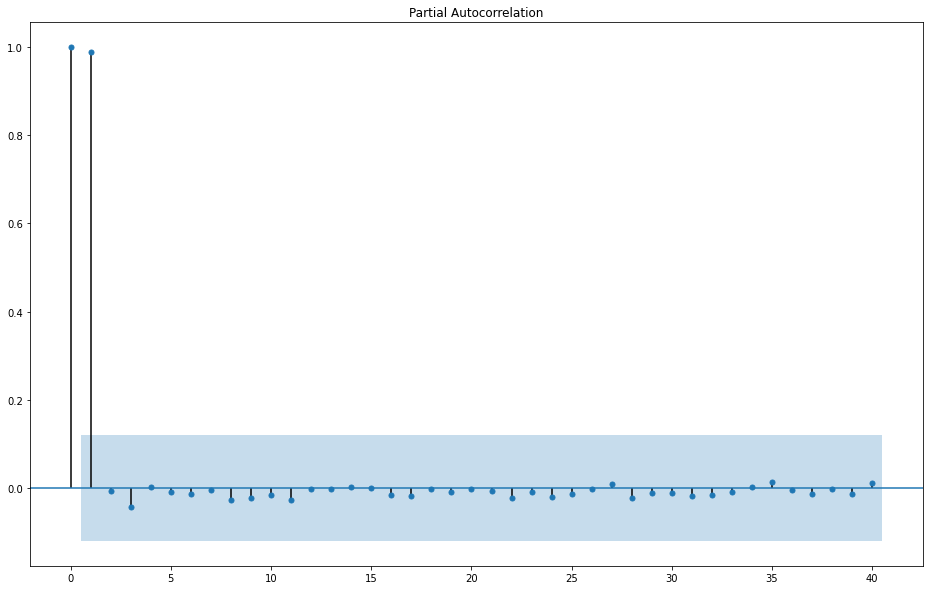

In [407]:
fig, axe = plt.subplots(figsize=(16,10))
plot_pacf(data_3['Inventories'], ax=axe, lags=40);

In [408]:
# pacf graph showing have cut off lag in 1
# acf grah showing downward slow move
stepwise_fit = auto_arima(data_3['Inventories'], startp=0, start_q=0,max_p=2,max_q=2, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5421.178, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.437 seconds


In [409]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Fri, 13 Nov 2020   AIC                           5348.037
Time:                        07:46:44   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [447]:
print(len(data_3))
data_3['Inventories'] = data_3['Inventories'].astype(float) 


264


In [411]:
train_data = data_3.iloc[:252]
test_data = data_3.iloc[252:]

In [412]:
model = ARIMA(train_data['Inventories'], order=(1,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Fri, 13 Nov 2020   AIC                           4980.790
Time:                        07:46:44   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.6171   1344.919      2.378      0.017     561.625    5833.610
ar.L1.D.Inventories     0.9026      0.039     23.013      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.049      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [413]:
# typ linear = return diff 1 value from time series(DIFF 1)
# typ  levels = return orginal value 

start = len(train_data)
end = len(train_data) + len(test_data)-1
predication = result.predict(start=start, end=end, typ='levels').rename('ARIMA (1,1,1) predication')

In [414]:
predication

2018-01-01    2.107148e+06
2018-02-01    2.110526e+06
2018-03-01    2.113886e+06
2018-04-01    2.117231e+06
2018-05-01    2.120561e+06
2018-06-01    2.123878e+06
2018-07-01    2.127184e+06
2018-08-01    2.130479e+06
2018-09-01    2.133765e+06
2018-10-01    2.137042e+06
2018-11-01    2.140311e+06
2018-12-01    2.143573e+06
Freq: MS, Name: ARIMA (1,1,1) predication, dtype: float64

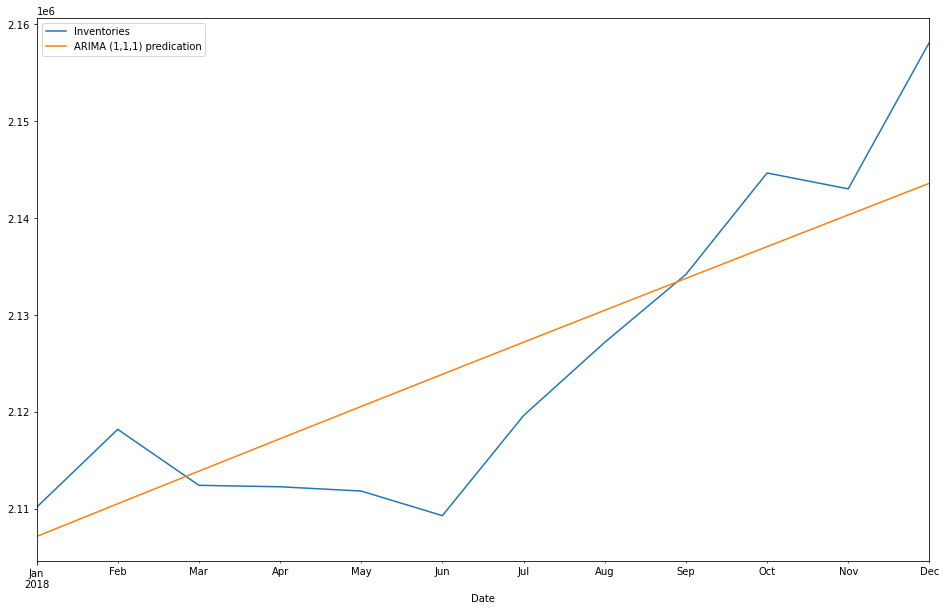

In [415]:
test_data['Inventories'].plot(figsize=(16,10), legend=True)
predication.plot(legend=True)

In [416]:
error  = rmse(test_data['Inventories'], predication)
error

7789.561238050531

In [417]:
test_data['Inventories'].mean()

2125075.6666666665

In [418]:
predication.mean()

2125465.342826205

**Forcating to future**

In [419]:
f_model = ARIMA(data_3['Inventories'], order=(1,1,1))
result = f_model.fit()

In [420]:
forcast = result.predict(start=len(data_3), end=len(data_3)+11, typ='levels').rename("model (1,1,1) forcast")

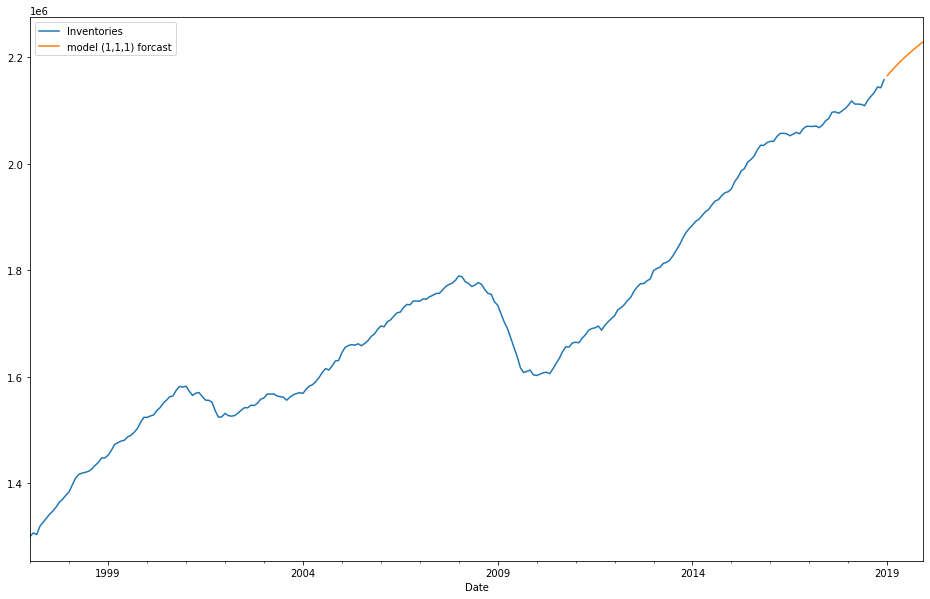

In [421]:
data_3['Inventories'].plot(legend=True, figsize=(16,10))
forcast.plot(legend=True)

**Model Order(0,1,0)**

In [422]:

model = ARIMA(train_data['Inventories'], order=(0,1,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2550.053
Method:                           css   S.D. of innovations           6251.869
Date:                Fri, 13 Nov 2020   AIC                           5104.106
Time:                        07:46:45   BIC                           5111.157
Sample:                    02-01-1997   HQIC                          5106.944
                         - 12-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3197.5697    394.614      8.103      0.000    2424.140    3971.000
==============================================================================
"""

In [423]:

start = len(train_data)
end = len(train_data) + len(test_data)-1
predication = result.predict(start=start, end=end, typ='levels').rename('ARIMA (0,1,0) predication')

In [424]:
prediction

2018-01-01    2.107148e+06
2018-02-01    2.110526e+06
2018-03-01    2.113886e+06
2018-04-01    2.117231e+06
2018-05-01    2.120561e+06
2018-06-01    2.123878e+06
2018-07-01    2.127184e+06
2018-08-01    2.130479e+06
2018-09-01    2.133765e+06
2018-10-01    2.137042e+06
2018-11-01    2.140311e+06
2018-12-01    2.143573e+06
Freq: MS, Name: ARIMA (1,1,1) predication, dtype: float64

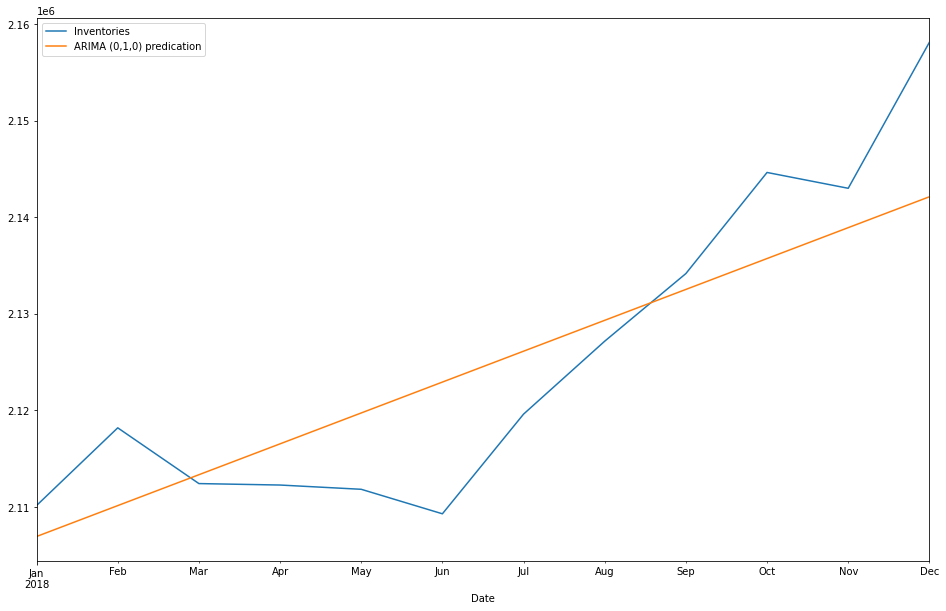

In [425]:
test_data['Inventories'].plot(figsize=(16,10), legend=True)
predication.plot(legend=True)

In [426]:
error  = rmse(test_data['Inventories'], predication)

In [427]:
error

7875.695061456444

In [428]:
test_data['Inventories'].mean()

2125075.6666666665

In [429]:
predication.mean()

2124535.203187253

In [430]:
f_model = ARIMA(data_3['Inventories'], order=(0,1,0))
result_1 = f_model.fit()

In [431]:
forcast_1 = result_1.predict(start=len(data_3), end=len(data_3)+11, typ='levels').rename("model (0,1,0) forcast")

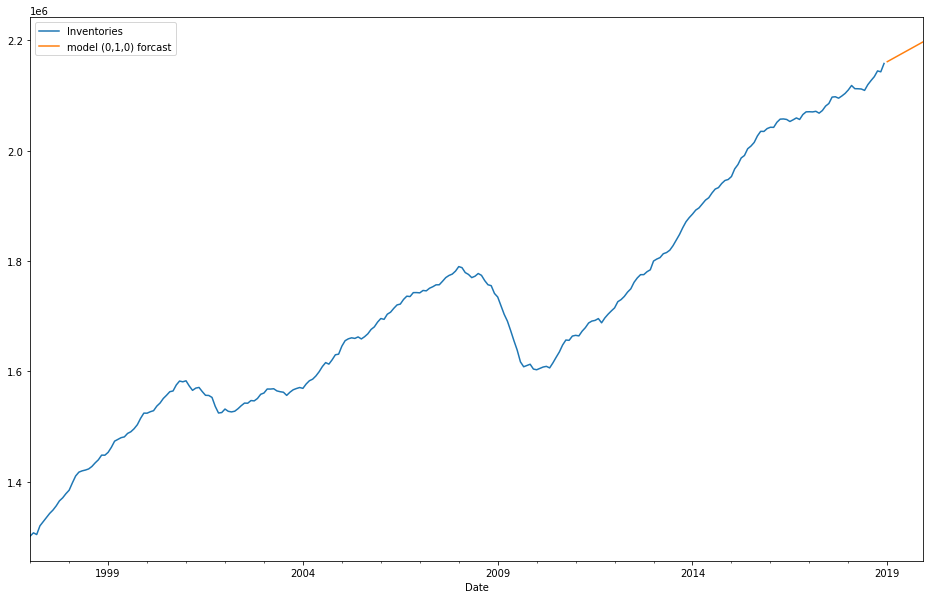

In [432]:
data_3['Inventories'].plot(legend=True, figsize=(16,10))
forcast_1.plot(legend=True)

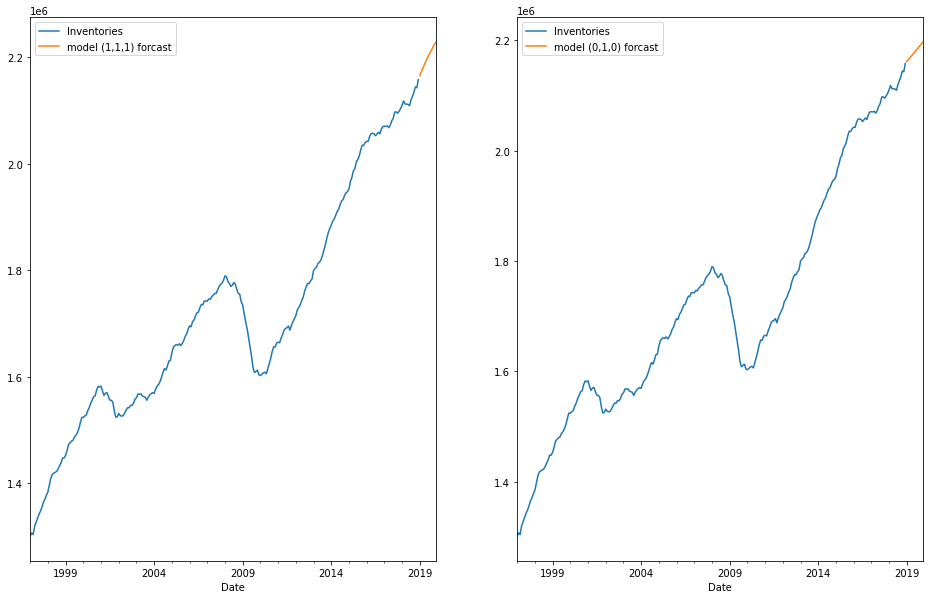

In [433]:
fig, axe = plt.subplots(1,2, figsize=(25,20))
data_3['Inventories'].plot(legend=True, figsize=(16,10), ax=axe[0])
forcast.plot(legend=True, ax=axe[0])

data_3['Inventories'].plot(legend=True, figsize=(16,10), ax=axe[1])
forcast_1.plot(legend=True, ax=axe[1])

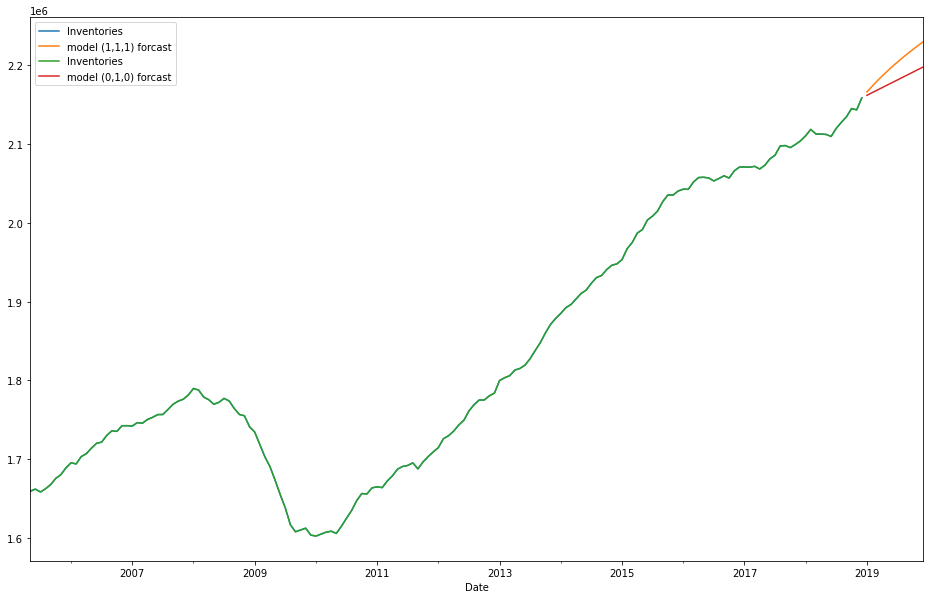

In [458]:
fig, axe = plt.subplots(1,1, figsize=(16,10))
data_3_temp = data_3.iloc[100:]
data_3_temp['Inventories'].plot(legend=True, figsize=(16,10), ax=axe)
forcast.plot(legend=True, ax=axe)
data_3_temp['Inventories'].plot(legend=True, figsize=(16,10), ax=axe)
forcast_1.plot(legend=True, ax=axe)
